# retrieve sequencing meta data from GEO
GEO: gene expression omnibus

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Bio
import json

%load_ext autoreload
%autoreload 2

## download data:
- download soft data, read counts data
- use python scripts
- download geo using nextflow. That is recommended

In [110]:
acc_no = 287800
url = 'ftp://ftp.ncbi.nlm.nih.gov/geo/series'

In [ ]:
# download through Python
import subprocess

n = 0
with open('../results/download_soft.log', 'w) as log:
    for i in range(1, acc_no):
        i = str(i)
        k1 = "GSE" + i
        k2 = i[:-3] if len(i) > 3 else ''
        k2 = "GSE" + k2 + 'nnn'
        cmd = ['wget', '-m', '-r', '-q',  f"{url}/{k2}/{k1}/soft" , '-P',  '/home/yuan/data/']
        try:
            # print(cmd)
            subprocess.run(cmd, check=True)
            n += 1
            if n % 100 == 0:
                print(n, end=', ')
        except Exception as e:
            err = f"record={i}, command=" + ' '.join(cmd) + f", error=str(e)\n"
            log.write(err)
print(f"\n\nTotal {n} soft are downloaded")

In [109]:
# prepare soft_urls.txt consumed by nextflow
n = 0
with open('../results/soft_urls.txt', 'w') as f:
    for i in range(1, acc_no):
        i = str(i)
        k1 = "GSE" + i
        k2 = i[:-3] if len(i) > 3 else ''
        k2 = "GSE" + k2 + 'nnn'
        f.write(f"{url}/{k2}/{k1}/soft"+ "\n")
        n += 1
print(f"Total {n} soft are downloaded")

Total 287799 soft are downloaded


## categorize meta data

### by taxid

In [35]:
from parse_soft import ParseSoft
# categorize data by taxid
indir = '/home/yuan/data/ftp.ncbi.nlm.nih.gov/geo/series'
softer = ParseSoft(indir)

data = {}
file_iter = softer.file_iter()
for path in file_iter:
    _data = softer.filter_data(path, softer.taxid)
    if 'key' in _data:
        key = _data['key']
        if key not in data:
            data[key] = [_data]
        else:
            data[key].append(_data)

1000, 2000, 3000, 4000, error='utf-8' codec can't decode byte 0xa0 in position 7502: invalid start byte, path=/home/yuan/data/ftp.ncbi.nlm.nih.gov/geo/series/GSE20nnn/GSE20670/soft/GSE20670_family.soft.gz
7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, error='utf-8' codec can't decode byte 0x96 in position 4595: invalid start byte, path=/home/yuan/data/ftp.ncbi.nlm.nih.gov/geo/series/GSE7nnn/GSE7525/soft/GSE7525_family.soft.gz
25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, error='utf-8' codec can't decode byte 0xa0 in position 4970: invalid start byte, path=/home/yuan/data/ftp.ncbi.nlm.nih.gov/geo/series/GSE1nnn/GSE1065/soft/GSE1065_family.soft.gz
error='utf-8' codec can't decode byte 0xdf in position 7209: invalid continuation byte, path=/home/yuan/data/ftp.ncbi.nlm.nih.gov/geo/series/GSE1nnn/GSE1969/soft/GSE1969_family.soft.gz
39000, 40000, 41000, 42000, 43000, 44000, 45000

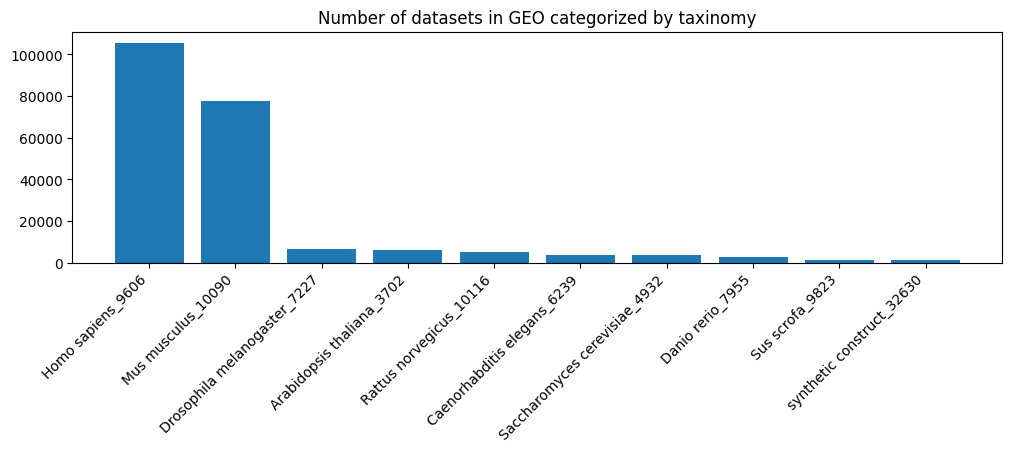

In [49]:
count_taxid = dict([(k, len(v)) for k,v in data.items()])
count_taxid = pd.Series(count_taxid).sort_values(ascending=False)

top = count_taxid[:10]
plt.figure(figsize=(12,3))
plt.bar(top.index, top)
plt.title('Number of datasets in GEO categorized by taxinomy')
plt.xticks(rotation=45, ha='right')
plt.show()

### experiment_type in human 9606 

In [94]:
from parse_soft import ParseSoft
# categorize data by taxid
indir = '/home/yuan/data/ftp.ncbi.nlm.nih.gov/geo/series'
softer = ParseSoft(indir)

human_type = {}
file_iter = softer.file_iter()
for path in file_iter:
    _data = softer.filter_data(path, softer.human_series_type)
    if 'key' in _data:
        key = _data['key']
        if key not in human_type:
            human_type[key] = [_data]
        else:
            human_type[key].append(_data)


5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000, 100000, 105000, 110000, 115000, 120000, 125000, 130000, 135000, 140000, 145000, 150000, 155000, 160000, 165000, 170000, 175000, 180000, 185000, 190000, 195000, 200000, 205000, 210000, 215000, 220000, 225000, 230000, 235000, 240000, 245000, 

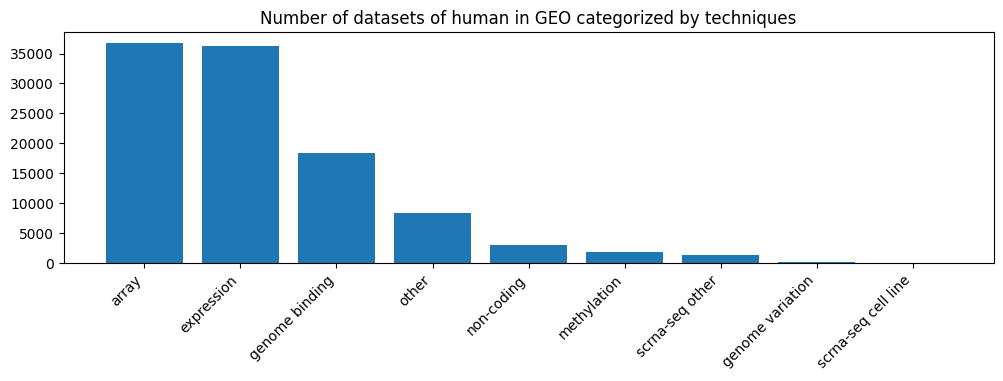

In [95]:
counts = dict([(k, len(v)) for k,v in human_type.items()])
counts = pd.Series(counts).sort_values(ascending=False)

plt.figure(figsize=(12,3))
plt.bar(counts.index, counts)
plt.title('Number of datasets of human in GEO categorized by techniques')
plt.xticks(rotation=45, ha='right')
plt.show()

In [118]:
key = 'scrna-seq cell line'
df1 = pd.DataFrame(human_type[key])
print(len(df1))
print(df1.head())


col_summary = df1.pop('series_summary')
df1.insert(1, 'series_summary', col_summary)
df1.insert(1, 'cell_line', '')
df1.to_csv('../results/scrnaseq_cell_line_info.csv', sep=',', header=True, index=False)

106
         GEO                                    local_soft_file  \
0  GSE251683  /home/yuan/data/ftp.ncbi.nlm.nih.gov/geo/serie...   
1  GSE150672  /home/yuan/data/ftp.ncbi.nlm.nih.gov/geo/serie...   
2  GSE219165  /home/yuan/data/ftp.ncbi.nlm.nih.gov/geo/serie...   
3  GSE286399  /home/yuan/data/ftp.ncbi.nlm.nih.gov/geo/serie...   
4  GSE197778  /home/yuan/data/ftp.ncbi.nlm.nih.gov/geo/serie...   

                                         series_type  \
0  Expression profiling by high throughput sequen...   
1  Expression profiling by high throughput sequen...   
2  Expression profiling by high throughput sequen...   
3  Expression profiling by high throughput sequen...   
4  Expression profiling by high throughput sequen...   

                                      series_summary                  key  
0  Extranodal natural killer (NK)/T-cell lymphoma...  scrna-seq cell line  
1  The development of high-throughput single-cell...  scrna-seq cell line  
2  We previously created cel

In [125]:
df2 = df1[df1['series_summary'].str.contains('lung')]
df2

,GEO,cell_line,series_summary,local_soft_file,series_type,key
3,GSE286399,,To assess the impact of CPA inhibition by JTE-...,/home/yuan/data/ftp.ncbi.nlm.nih.gov/geo/serie...,Expression profiling by high throughput sequen...,scrna-seq cell line
7,GSE183590,,To develop biomarkers for diagnosis of early-s...,/home/yuan/data/ftp.ncbi.nlm.nih.gov/geo/serie...,Expression profiling by high throughput sequen...,scrna-seq cell line
29,GSE249057,,Background and aims: Cancer metastasis is the ...,/home/yuan/data/ftp.ncbi.nlm.nih.gov/geo/serie...,Expression profiling by high throughput sequen...,scrna-seq cell line
30,GSE249056,,Background and aims: Cancer metastasis is the ...,/home/yuan/data/ftp.ncbi.nlm.nih.gov/geo/serie...,Expression profiling by high throughput sequen...,scrna-seq cell line
49,GSE269390,,In the lungs of chronic obstructive pulmonary ...,/home/yuan/data/ftp.ncbi.nlm.nih.gov/geo/serie...,Expression profiling by high throughput sequen...,scrna-seq cell line
67,GSE156750,,The molecular mechanism of melanoma metastasis...,/home/yuan/data/ftp.ncbi.nlm.nih.gov/geo/serie...,Expression profiling by high throughput sequen...,scrna-seq cell line
74,GSE122031,,"Despite intense study, the complexity of inter...",/home/yuan/data/ftp.ncbi.nlm.nih.gov/geo/serie...,Expression profiling by high throughput sequen...,scrna-seq cell line
79,GSE243665,,Single-cell RNA sequencing (scRNA-seq) has eme...,/home/yuan/data/ftp.ncbi.nlm.nih.gov/geo/serie...,Expression profiling by high throughput sequen...,scrna-seq cell line


In [117]:
with open('../results/scrnaseq_cell_line_urls.csv', 'w') as f:
    for geo in list(df1['GEO']):
        n = str(geo[3:])
        k1 = 'GSE' + n[:-3] + 'nnn' if len(n) > 3 else 'GSEnnn'
        url = f"ftp://ftp.ncbi.nlm.nih.gov/geo/series/{k1}/{geo}/suppl"
        f.write(geo+ ',' + url + '\n')

## parse data

In [ ]:
# validate soft download
from parse_soft import ParseSoft

local_dir = '/home/yuan/data/'
pcl = ParseSoft(local_dir)
pcl.validate_soft('../data/validate_soft.bash')

In [2]:
from parse_soft import ParseSoft

local_dir = '/home/yuan/data/'
pcl = ParseSoft(local_dir)
pcl.geo_pmid('../data')

/home/yuan/data/ftp.ncbi.nlm.nih.gov/geo/series/GSE137nnn/GSE137443/soft/GSE137443_family.soft.gz
/home/yuan/data/ftp.ncbi.nlm.nih.gov/geo/series/GSE83nnn/GSE83313/soft/GSE83313_family.soft.gz
/home/yuan/data/ftp.ncbi.nlm.nih.gov/geo/series/GSE83nnn/GSE83950/soft/GSE83950_family.soft.gz
/home/yuan/data/ftp.ncbi.nlm.nih.gov/geo/series/GSE83nnn/GSE83982/soft/GSE83982_family.soft.gz
/home/yuan/data/ftp.ncbi.nlm.nih.gov/geo/series/GSE83nnn/GSE83536/soft/GSE83536_family.soft.gz
/home/yuan/data/ftp.ncbi.nlm.nih.gov/geo/series/GSE83nnn/GSE83283/soft/GSE83283_family.soft.gz
/home/yuan/data/ftp.ncbi.nlm.nih.gov/geo/series/GSE83nnn/GSE83284/soft/GSE83284_family.soft.gz
/home/yuan/data/ftp.ncbi.nlm.nih.gov/geo/series/GSE83nnn/GSE83750/soft/GSE83750_family.soft.gz
/home/yuan/data/ftp.ncbi.nlm.nih.gov/geo/series/GSE83nnn/GSE83792/soft/GSE83792_family.soft.gz
/home/yuan/data/ftp.ncbi.nlm.nih.gov/geo/series/GSE16nnn/GSE16645/soft/GSE16645_family.soft.gz
/home/yuan/data/ftp.ncbi.nlm.nih.gov/geo/series

KeyboardInterrupt: 